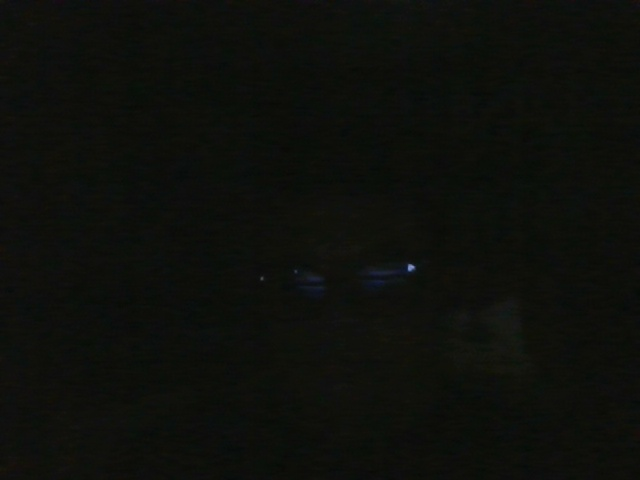

In [ ]:
# main.ipynb - Fragmentos clave

import cv2
import mediapipe as mp
from IPython.display import display, Image, clear_output
import numpy as np

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Flip para efecto espejo
        frame = cv2.flip(frame, 1)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Mostrar en notebook
        _, img_encoded = cv2.imencode('.jpg', frame)
        clear_output(wait=True)
        display(Image(data=img_encoded.tobytes()))

except KeyboardInterrupt:
    print("Interrumpido")

finally:
    cap.release()
    hands.close()